In [ ]:
# 딥러닝 관련 라이브러리 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MNIST 데이터셋 불러오기
mnist = keras.datasets.mnist

In [ ]:
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기   **** test자료는 필요 ******
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 데이터 전처리(0 ~ 1 사이 숫자로)
x_test = x_test / 255

In [ ]:
# Google Drive 에 모델을 저장하기 위해 Colab의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

# 마운트된 Google Drive 의 working directory 이동

import os

checkpoint_path = 'save_restore'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(checkpoint_path):
        os.mkdir(checkpoint_path)

    os.chdir(checkpoint_path)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
current dir =  /content/gdrive/My Drive/Colab Notebooks/save_restore


In [ ]:
ls {checkpoint_dir}

checkpoint  save_restore.data-00000-of-00001  save_restore.index


In [ ]:
# 동일한 모델 다시 만들기 : 입력층(784) - 은닉층1(256) - 은닉층2(128) - 은닉층3(64) - 출력층(10)
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(256, activation = 'relu'))  # ReLU는 정류 선형 유닛(Rectified Linear Unit 렉티파이드 리니어 유닛)이다. 입력값이 0보다 작으면 0으로 출력, 0보다 크면 입력값 그대로 출력하는 유닛
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 확률을 출력해준다, Softmax는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수

In [ ]:
# 모델 다시 컴파일 : 최적화 함수(보통 adam(Adaptive + momentum estimation),  SGD(확률적 경사하강), 손실 함수(실제값과 예측값과의 차이) 설정 + 평가 지표 설정 + 가중치 초기화)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# 가중치 로드
model.load_weights(checkpoint_path)

# 모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9788


[0.07136369496583939, 0.9787999987602234]

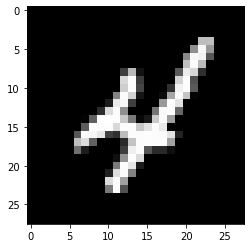

In [ ]:
# 예측 - 8번째 숫자 이미지로 보기
plt.imshow(x_train[9], cmap='gray')
plt.show()

In [ ]:
# 예측 - 8번째 숫자 예측하기1
print(model.predict(x_train[9].reshape(1, 28, 28)))

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# 예측 - 8번째 숫자 예측하기1
print(np.argmax(model.predict(x_train[9].reshape(1, 28, 28))))

4
